In [58]:
import pandas as pd
import io
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import spacy
nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
data =  pd.read_csv('reviews.csv', sep=',')
data.dropna()
data

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818.0,1191.0,30/03/2009,10952.0,Lam,Daniel is really cool. The place was nice and ...
1,2818.0,1771.0,24/04/2009,12798.0,Alice,Daniel is the most amazing host! His place is ...
2,2818.0,1989.0,03/05/2009,11869.0,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818.0,2797.0,18/05/2009,14064.0,Enrique,Very professional operation. Room is very clea...
4,2818.0,3151.0,25/05/2009,17977.0,Sherwin,Daniel is highly recommended. He provided all...
...,...,...,...,...,...,...
451224,NaN,NaN,NaN,NaN,NaN,NaN
451225,NaN,NaN,NaN,NaN,NaN,NaN
451226,NaN,NaN,NaN,NaN,NaN,NaN
451227,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
required_data= data["comments"]

comments_df=pd.DataFrame(required_data)
comments_df

,comments
0,Daniel is really cool. The place was nice and ...
1,Daniel is the most amazing host! His place is ...
2,We had such a great time in Amsterdam. Daniel ...
3,Very professional operation. Room is very clea...
4,Daniel is highly recommended. He provided all...
...,...
451224,NaN
451225,NaN
451226,NaN
451227,NaN


In [61]:
def clean_comments(data):
  
    data = data.drop_duplicates()
    data.columns = map(str.lower, data.columns)
    data = data.apply(lambda x: x.astype(str).str.lower())
   ## data.drop(columns=['comments'], inplace=True)
    # In our case missing values will be removed as they represent less than 5% of our data.
    data.dropna(subset=['comments'], axis=0, inplace=True)
    data['comments'] = data['comments'].map(lambda text :  patterns(text))
    data['comments'] = data['comments'].replace('\s+', ' ', regex=True)
    data['comments'] = data['comments'].map(lambda text : lemmatize_with_postag(text))
    return data
def lemmatize_with_postag(text):
    sent = TextBlob(text)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)
 '''
    The code below remove HTML tags, punctuations, numbers.
    Input paramaters:
        text: row of dataframe
    Output paramters:
        a clean text
  
    '''

def patterns(text):
   
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub('<.*?>', '', text)   
    text = re.sub(r'[^\w\s]', ' ', text) 
    text = re.sub(r'\d+',' ',text) 
    text = re.sub(r'@[\w_-]+', ' ', text)
    return text

In [62]:
after_cleaning = clean_comments(comments_df)

In [63]:
after_cleaning

,comments
0,daniel be really cool the place be nice and cl...
1,daniel be the most amazing host his place be e...
2,we have such a great time in amsterdam daniel ...
3,very professional operation room be very clean...
4,daniel be highly recommended he provide all ne...
...,...
199993,sam be very helpful and nice host he allow u t...
199994,the appartment of sam and our stay in amsterda...
199995,pieter place have be perfect for u clean simpl...
199996,our stay at pieter apartment be very pleasant ...


In [72]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
after_cleaning['comments'] = after_cleaning['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [74]:
without_StopWords = pd.DataFrame(after_cleaning)

In [75]:
without_StopWords

,comments
0,daniel really cool place nice clean quiet neig...
1,daniel amazing host place extremely clean prov...
2,great time amsterdam daniel excellent host fri...
3,professional operation room clean comfortable ...
4,daniel highly recommended provide necessity ac...
...,...
199993,sam helpful nice host allow u early check late...
199994,appartment sam stay amsterdam amaze recommend ...
199995,pieter place perfect u clean simple yet cosy e...
199996,stay pieter apartment pleasant welcome pieter ...


In [90]:
''''
 The code below put a polarity score for each word
    Input paramaters:
        df_with_stop_word: dataframe without invalid characters and stop words
    Output paramters:
        a polarity score array, neighboudhood dataframe and dataframe that contain stop words.
''''

def score_sentimental( without_StopWords):
    
    polarity_score_list = [round(TextBlob(word).polarity,1) for word in without_StopWords['comments']]
    without_StopWords['polarity_score'] = polarity_score_list
    without_StopWords['label_polarity'] = 'neutral'
    without_StopWords.loc[without_StopWords[without_StopWords['polarity_score'] == 0].index, ['label_polarity']] = 'neutral'
    without_StopWords.loc[without_StopWords[(without_StopWords['polarity_score'] > 0) & (without_StopWords['polarity_score'] < 0.6)].index,
                 ['label_polarity']] = 'positive'
    without_StopWords.loc[without_StopWords[(without_StopWords['polarity_score'] >= 0.6) & (without_StopWords['polarity_score'] <= 1.0)].index,
                 ['label_polarity']] = 'highly positive'
    without_StopWords.loc[without_StopWords[(without_StopWords['polarity_score'] < 0) & (without_StopWords['polarity_score'] > -0.6)].index,
                 ['label_polarity']] = 'negative'
    array_polarity_score = np.unique(polarity_score_list, return_counts=True)
   
    print('Finished the polarity analysis')
    return array_polarity_score,  without_StopWords

In [95]:
array_of_polarity,review_score=score_sentimental( without_StopWords)

Finished the polarity analysis


In [109]:
review_score

,comments,polarity_score,label_polarity
0,daniel really cool place nice clean quiet neig...,0.1,positive
1,daniel amazing host place extremely clean prov...,0.3,positive
2,great time amsterdam daniel excellent host fri...,0.3,positive
3,professional operation room clean comfortable ...,0.4,positive
4,daniel highly recommended provide necessity ac...,0.3,positive
...,...,...,...
199993,sam helpful nice host allow u early check late...,0.2,positive
199994,appartment sam stay amsterdam amaze recommend ...,0.0,neutral
199995,pieter place perfect u clean simple yet cosy e...,0.6,highly positive
199996,stay pieter apartment pleasant welcome pieter ...,0.4,positive


In [110]:
'''
    The code below show the polarity distribution. 
    Input paramaters:
        data: dataframe without invalid characters
    Output paramters:
        a plot.
  
    '''

def review_polarity_level( data):
    
    plt.figure(figsize=(8, 4))
    ax = data['label_polarity'].value_counts().plot(kind='bar',color="indianred")
    ax.set_xlabel("polarity_score", fontsize=12)
    ax.set_ylabel("count", fontsize=12)
    plt.show()

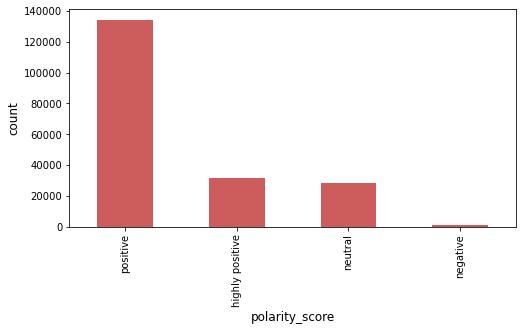

In [112]:
review_polarity_level(review_score)

In [113]:
def review_polarity( array_polarity_score):
    '''
    The code below show the number of reviews. 
    Input paramaters:
        array_polarity_score: array polarityscore
    Output paramters:
        a plot.
  
    '''
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(array_polarity_score[0], array_polarity_score[1], color="salmon", saturation=.5)
    ax.set_xlabel('Airbnb review', fontsize=14)
    ax.set_ylabel('Number of reviews', fontsize=14)
    plt.savefig('polarity_level_plot', transparent=True,
                    bbox_inches='tight', pad_inches=0)
    plt.show()

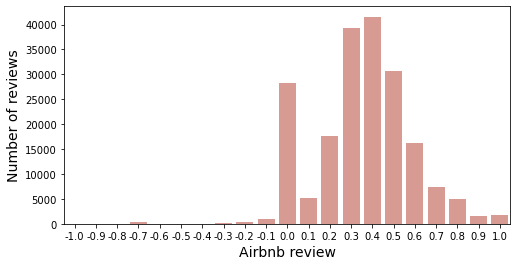

In [115]:
review_polarity(array_of_polarity)

<function matplotlib.pyplot.show(*args, **kw)>

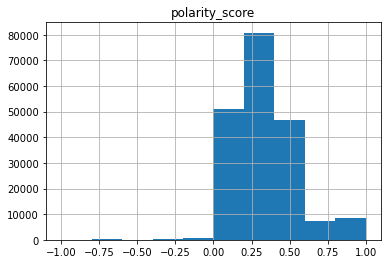

In [129]:
review_score.hist()
plt.show